In [2]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt

In [3]:
db=pd.read_csv("/Users/habiba/Downloads/online_retail_II.csv")

In [4]:
db.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
db["InvoiceDate"] = pd.to_datetime(db["InvoiceDate"])
db.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
db = db[db["Price"].gt(0)]

In [8]:
db = db.dropna(subset=["Customer ID"])

In [9]:
db["amount"] = db["Quantity"] * db["Price"]
db["refund"] = (db["Quantity"] < 0) | db["Invoice"].astype(str).str.startswith("C")
db.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount,refund
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,False


In [11]:
db["last_purchase_date"] = db.groupby("Customer ID")["InvoiceDate"].transform("max")


In [12]:
db.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount,refund,last_purchase_date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,False,2011-07-05 12:11:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False,2011-07-05 12:11:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False,2011-07-05 12:11:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,False,2011-07-05 12:11:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,False,2011-07-05 12:11:00


In [13]:
# Find the last invoice date per customer
last_orders = db.groupby("Customer ID")["InvoiceDate"].max().reset_index()
print(last_orders)

      Customer ID         InvoiceDate
0         12346.0 2011-01-18 10:17:00
1         12347.0 2011-12-07 15:52:00
2         12348.0 2011-09-25 13:13:00
3         12349.0 2011-11-21 09:51:00
4         12350.0 2011-02-02 16:01:00
...           ...                 ...
5934      18283.0 2011-12-06 12:02:00
5935      18284.0 2010-10-06 12:31:00
5936      18285.0 2010-02-17 10:24:00
5937      18286.0 2010-08-20 11:57:00
5938      18287.0 2011-10-28 09:29:00

[5939 rows x 2 columns]


In [16]:
rfm_date= db["InvoiceDate"].max() + pd.Timedelta(days=1)
rfm_date

Timestamp('2011-12-10 12:50:00')

In [19]:
rfm = (db.groupby("Customer ID").agg(
        recency_days=("InvoiceDate", lambda s: (rfm_date - s.max()).days),
        frequency=("Invoice", "nunique"),
        monetary=("amount", "sum"))
       .reset_index())


In [20]:
rfm.head()

,Customer ID,recency_days,frequency,monetary
0,12346.0,326,17,-64.68
1,12347.0,2,8,5633.32
2,12348.0,75,5,2019.40
3,12349.0,19,5,4404.54
4,12350.0,310,1,334.40


In [23]:
# Recency score (1 = least recent, 5 = most recent)
rfm['R_Score'] = pd.qcut(rfm['recency_days'], 5, labels=[5,4,3,2,1]).astype(int)

# Frequency score (1 = least frequent, 5 = most frequent)
rfm['F_Score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

# Monetary score (1 = lowest spenders, 5 = highest spenders)
rfm['M_Score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5]).astype(int)

# Combining RFM Scores into a Single Column
rfm['RFM_Score'] = rfm['R_Score'].map(str) + rfm['F_Score'].map(str) + rfm['M_Score'].map(str)

In [24]:
rfm.head()

,Customer ID,recency_days,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,326,17,-64.68,2,5,1,251
1,12347.0,2,8,5633.32,5,4,5,545
2,12348.0,75,5,2019.40,3,3,4,334
3,12349.0,19,5,4404.54,4,3,5,435
4,12350.0,310,1,334.40,2,1,2,212


In [29]:
def segment_rfm(df):
    if df['R_Score'] == 5 and df['F_Score'] == 5:
        return 'Best Customers'
    elif df['F_Score'] >= 4:
        return 'Loyal Customers'
    elif df['R_Score'] <= 2 and df['F_Score'] >= 3:
        return 'At Risk'
    else:
        return 'Others'


In [30]:
rfm['Segment'] = rfm.apply(segment_rfm, axis=1)

In [32]:
rfm[['Customer ID', 'RFM_Score', 'Segment']].head(10)

,Customer ID,RFM_Score,Segment
0,12346.0,251,Loyal Customers
1,12347.0,545,Loyal Customers
2,12348.0,334,Others
3,12349.0,435,Others
4,12350.0,212,Others
5,12351.0,212,Others
6,12352.0,454,Loyal Customers
7,12353.0,222,Others
8,12354.0,213,Others
9,12355.0,223,Others


In [33]:
segment_counts = rfm['Segment'].value_counts()
print(segment_counts)

Others             3095
Loyal Customers    1796
Best Customers      580
At Risk             468
Name: Segment, dtype: int64


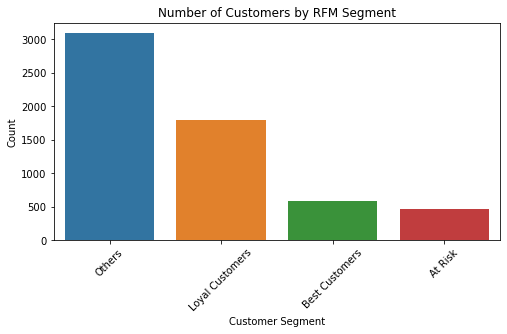

In [35]:
plt.figure(figsize=(8,4))
snb.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Number of Customers by RFM Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
